# AI-Based Cat Emotion Detector Iteration 1
**Author:** Anh Huynh

**Class:** AI4 – RB01

**Semester Coach:** Mrs. Priyanka Darbari

# 1. Introduction

## 1.1 Project Objective

This project focuses on developing a machine learning model to classify cat emotions—`angry`, `happy`, and `sad`—using image data. The objective is to create a practical tool for pet owners to better understand their cats’ emotional states, employing classical machine learning techniques such as Support Vector Machines (SVM) and Random Forest models. The work adheres to the ICT & AI project methodology, progressing through proposal, provisioning, predictions, and delivery phases in a structured manner.

## 1.2 Summary of Iteration 0

Iteration 0 established the foundation for the CatEmotionDetector project:

- **Data Collection**: Two Roboflow datasets were collected:
  - *Cat Emotions.v1-test.folder* (CATS team, 2023), containing ~670 images.
  - *Cat Emotions.v2i.folder* (Cat Emotion Classification, 2024), containing ~2,000 images. These were filtered to focus on `happy`, `sad`, and `angry` emotions, resulting in 369 images (98 `happy`, 132 `sad`, 139 `angry`).

- **Data Preparation**:
  - The `happy` class was augmented to 150 images using flips, rotations, and brightness adjustments to address imbalance.
  - SMOTE was tested to balance the dataset to 200 images per class (600 total), but the synthetic images were blurry and unsuitable for training.
  - Enhanced augmentation (crops, GammaContrast) balanced the dataset to 600 images (200 per class).
  - Images were preprocessed by extracting HOG features from 64x64 grayscale images, yielding 648 features per image.

- **Modeling**:
  - A linear kernel SVM achieved 46% accuracy, with no improvement after tuning the C parameter.
  - An RBF kernel SVM (C=10, gamma=0.1) improved accuracy to 68%.
  - The `happy` class showed strong performance (recall 0.85), while `sad` improved (recall from 40% to 62%).

- **Next Steps**: Plans were made to compare SVM with a Random Forest model, gather more diverse data, and incorporate teacher feedback for improvements.

## 1.3 What's in This Notebook

### What
Iteration 1 expands the dataset to 1,000 images with a new Kaggle source, refines preprocessing (resizing, Gaussian blur, HOG feature extraction), and introduces a Random Forest model to compare with SVM. Dataset quality is analyzed using sharpness (variance of the Laplacian) and truthfulness (image entropy, Sobel filter) techniques. Model performance is evaluated by retraining the SVM (RBF, C=10, gamma=0.1), training and tuning a Random Forest model, and comparing results with and without flagged images.

### Why
The aim is to improve the model’s generalization and reliability. Iteration 0 identified challenges with a small dataset (600 images) and limited diversity in angles, lighting, and breeds, which are addressed by collecting additional data and refining preprocessing.

### How
Newly collected data is integrated, preprocessing is applied systematically, and feedback is incorporated to enhance clarity and structure. Evaluations measure the impact of the expanded dataset and Random Forest performance compared to SVM.

# 2. Data Collection

This section gathers high-quality, diverse cat images labeled as happy, sad, or angry for supervised learning.

## 2.1 Defining Data Requirements

The dataset must include:
- High-quality cat images labeled as `happy`, `sad`, or `angry`.
- Clear labels for supervised learning, focusing solely on these emotions.
- Diverse images in terms of angles, lighting, and breeds for robustness.
- Images not matching these emotions are filtered out, and datasets are verified to meet these criteria.

## 2.2 Collecting the Data

Three datasets are combined, including the two Roboflow datasets from Iteration 0 and a new Kaggle dataset for increased diversity:

- **Dataset 1**: *[Cat Emotions Computer Vision Project](https://universe.roboflow.com/cats-xofvm/cat-emotions)* (CATS team, 2023), ~670 images across `train` and `valid` folders, including emotions like `happy`, `sad`, and `angry`.
- **Dataset 2**: *[Cat Emotions Computer Vision Project](https://universe.roboflow.com/cat-emotion-classification/cat-emotions-cgrxv)* (Cat Emotion Classification, 2024), ~2,000 images in a `train` folder, including `sad` and `angry` but lacking `happy`.
- **Dataset 3**: *[Pet's Facial Expression Image Dataset](https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset?resource=download)* (Tanwar, 2023) from Kaggle, containing ~1000 images of various animals, manually filtered to include only cat images labeled as `happy`, `sad`, or `angry`.

Images are filtered to retain only the target emotions. For Dataset 3, manual filtering excluded non-cat images and irrelevant emotions. The code below collects and combines the datasets.

In [1]:
import os
import pandas as pd

# Paths to datasets
dataset1_path = r"C:\Users\huynh\Desktop\Jupyter\CatEmotionDetector\Cat Emotions.v1-test.folder"
dataset2_path = r"C:\Users\huynh\Desktop\Jupyter\CatEmotionDetector\Cat Emotions.v2i.folder"
dataset3_path = r"C:\Users\huynh\Desktop\Jupyter\CatEmotionDetector\CatDatasetKaggle"

# Target emotions
target_emotions = ['happy', 'sad', 'angry']

# Collect images
image_data = []

def collect_images(base_path, subfolder, emotion_map=None):
    folder_path = os.path.join(base_path, subfolder)
    for emotion in os.listdir(folder_path):
        final_emotion = emotion_map.get(emotion, emotion) if emotion_map else emotion
        if final_emotion.lower() in [e.lower() for e in target_emotions]:
            emotion_path = os.path.join(folder_path, emotion)
            for img_file in os.listdir(emotion_path):
                if img_file.endswith(('.jpg', '.jpeg', '.png')):
                    full_path = os.path.join(emotion_path, img_file)
                    image_data.append({'filename': full_path, 'emotion': final_emotion.lower()})

# Dataset 1: 
collect_images(dataset1_path, 'train')
collect_images(dataset1_path, 'valid')
print("Images from Dataset 1:", len(image_data))

# Dataset 2: 
collect_images(dataset2_path, 'train')
print("Images after adding Dataset 2:", len(image_data))

# Dataset 3: 
collect_images(dataset3_path, '')
print("Total images after adding Dataset 3:", len(image_data))

Images from Dataset 1: 295
Images after adding Dataset 2: 369
Total images after adding Dataset 3: 616


## 2.3 Storing and Naming the Data

The datasets are stored locally at `C:\Users\huynh\Desktop\Jupyter\CatEmotionDetector`. Local storage is practical for individual work, ensuring accessibility. A CSV file, `master_dataset_labels_v2.csv`, stores metadata with filenames and emotion labels.

In [1]:
# Save to CSV
df = pd.DataFrame(image_data)
df['emotion'] = df['emotion'].str.lower()
df.to_csv('master_dataset_labels_v2.csv', index=False)

print("First 5 entries in the CSV:")
print(df.head())

NameError: name 'pd' is not defined

## 2.4 Data Dictionary

A data dictionary documents the dataset elements after import.

| Data Element Name | Data Type   | Description                          | Source                     | Quality Standards         | Notes                     |
|-------------------|-------------|--------------------------------------|----------------------------|---------------------------|---------------------------|
| filename          | Text        | File path to the cat image           | Dataset 1, Dataset 2, Dataset 3 | Must be a valid path      | Used to load images       |
| emotion           | Categorical | Emotion expressed by the cat (happy, sad, angry) | Dataset 1, Dataset 2, Dataset 3 | Must be manually verified | Possible mislabeling      |

## 2.5 Reflections on Collection

The collection process resulted in 616 images: 295 from Dataset 1, 74 from Dataset 2, and 247 from Dataset 3. The CSV file streamlines data management by eliminating the need to reload folders repeatedly. Dataset 1 provides a balanced mix of emotions, while Dataset 2 lacks `happy` images, a gap addressed by Dataset 3. Manual filtering of the Kaggle dataset was time-intensive due to non-cat images, but the folder structure ensured accurate emotion labels. Although 616 images mark an improvement, the dataset size may still be insufficient for SVM and Random Forest models, as research suggests 1,000+ images for optimal performance. The next steps will focus on balancing classes and increasing the dataset size through augmentation to enhance diversity in angles, lighting, and breeds.

# 3. Data Understanding

This section assesses the dataset’s balance, diversity, and quality to ensure it supports robust model training.

## 3.1 Checking the Balance

The distribution of emotions is examined using a pie chart.

Images per emotion:
emotion
angry    313
sad      178
happy    125
Name: count, dtype: int64


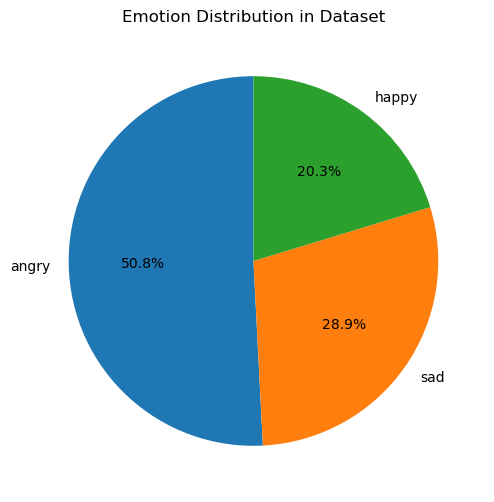

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('master_dataset_labels_v2.csv')

print("Images per emotion:")
print(df['emotion'].value_counts())

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['emotion'].value_counts(), labels=df['emotion'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution in Dataset')
plt.show()

The distribution reveals an imbalance: `angry` (50.8%, 313 images), `sad` (28.9%, 178 images), and `happy` (20.3%, 125 images). Augmentation will target underrepresented classes (happy, sad) to reach 1,000 images.

## 3.2 Assessing Diversity

Diversity in angles, lighting, and breeds is visually inspected by sampling images from each emotion class.

Displaying samples for happy:


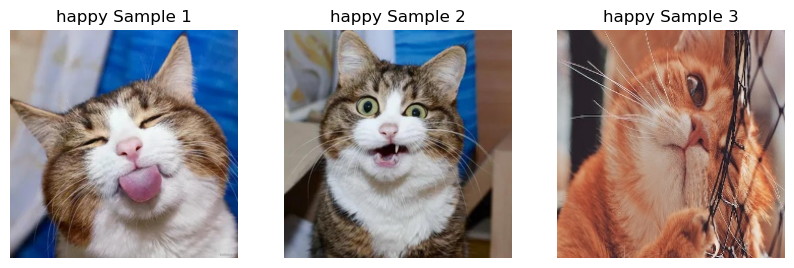

Displaying samples for sad:


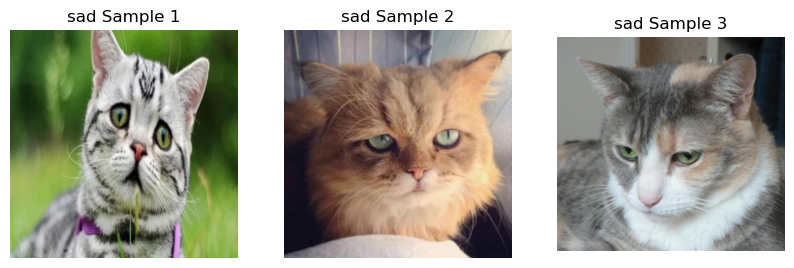

Displaying samples for angry:


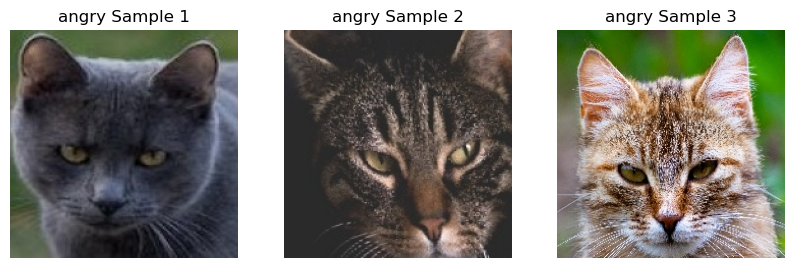

In [4]:
import cv2
import matplotlib.pyplot as plt

# Function to display sample images
def display_samples(emotion, num_samples=3):
    samples = df[df['emotion'] == emotion].sample(num_samples)
    plt.figure(figsize=(10, 3))
    for i, (_, row) in enumerate(samples.iterrows()):
        img = cv2.imread(row['filename'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{emotion} Sample {i+1}")
        plt.axis('off')
    plt.show()

# Display samples for each emotion
for emotion in ['happy', 'sad', 'angry']:
    print(f"Displaying samples for {emotion}:")
    display_samples(emotion)

The sampled images show diversity in angles (front-facing, side profiles), lighting (bright, dim, natural), and breeds (e.g., calico, tabby, gray cats). Happy images often depict relaxed poses, sad images show neutral or downward expressions, and angry images feature dynamic expressions like open mouths or narrowed eyes. However, some images appear potentially unrealistic (based on feedback on Iteration 0 and manually checking), necessitating a truthfulness check.

## 3.3 Quality Check

The dataset’s quality is assessed by checking for missing files, duplicates, quality differences, and image truthfulness.

### 3.3.1 Missing Files and Duplicates

The dataset is verified for missing files and duplicates.

In [5]:
import os

# Check for missing files
missing_files = df['filename'].apply(lambda x: not os.path.exists(x)).sum()
print("Missing files:", missing_files)
if missing_files == 0:
    print("All files are present.")
else:
    print("Some files are missing and need to be addressed.")

# Check for duplicates
total_images = len(df)
unique_files = len(df['filename'].unique())
print("Total images:", total_images)
print("Unique image files:", unique_files)
if total_images == unique_files:
    print("No duplicates found across datasets.")
else:
    print("Duplicates are present, possibly due to overlap between datasets.")

Missing files: 0
All files are present.
Total images: 616
Unique image files: 616
No duplicates found across datasets.


### 3.3.2 Quality Differences
Quality differences between datasets are evaluated using the variance of the Laplacian to measure sharpness.

***Variance of the Laplacian:***

- **What It Is:** This metric measures image sharpness by applying the Laplacian operator to detect edges via the second derivative of pixel intensities. Higher variance indicates sharper images with defined edges, while lower variance suggests blur.
- **How It Helps:** Sharp images enhance HOG feature extraction by providing clear edge information (e.g., ear position, eye shape).
- **Source** OpenCV Documentation: Image Gradients. 
  https://docs.opencv.org/4.x/d5/db5/tutorial_laplace_operator.html

In [6]:
import cv2
import numpy as np

# Function to compute sharpness using variance of Laplacian
def compute_sharpness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    return np.var(laplacian)

# Compute sharpness for a sample from each dataset
datasets = {
    'Dataset 1': df[df['filename'].str.contains('Cat Emotions.v1-test.folder')].sample(10),
    'Dataset 2': df[df['filename'].str.contains('Cat Emotions.v2i.folder')].sample(10),
    'Dataset 3': df[df['filename'].str.contains('CatDatasetKaggle')].sample(10)
}

for dataset_name, sample in datasets.items():
    sharpness_values = [compute_sharpness(row['filename']) for _, row in sample.iterrows() if compute_sharpness(row['filename']) is not None]
    print(f"{dataset_name} - Average Sharpness: {np.mean(sharpness_values):.2f}")

Dataset 1 - Average Sharpness: 227.48
Dataset 2 - Average Sharpness: 2525.74
Dataset 3 - Average Sharpness: 3013.17


**Analysis:** Dataset 3 (Kaggle) exhibits the highest sharpness, indicating well-defined edges that should enhance HOG feature extraction for features like ears and whiskers. Dataset 1, with the lowest sharpness, may contain softer or lower-resolution images, potentially impacting feature quality. Preprocessing steps such as Gaussian blur will be applied to ensure consistency across datasets.

### 3.3.3 Truthfulness of Images

The truthfulness of images is assessed using image entropy and edge consistency (Sobel filter) to flag potentially artificial images

***Image Entropy:***

- **What It Is:** Entropy measures the randomness of pixel intensities. Natural images with high texture (e.g., fur, backgrounds) have higher entropy (5.0–6.0), while edited or AI-generated images often have lower entropy (<4.7).
- **How It Helps:** Low entropy flags artificial images that may misrepresent cat emotions, ensuring dataset authenticity.
- **Source:** SciPy Documentation: scipy.stats.entropy. 
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html

***Edge Consistency (Sobel Filter):***

- **What It Is:** The Sobel filter detects edges by calculating gradients in the x and y directions. The standard deviation of edge magnitudes (Sobel Std) measures consistency. Natural images typically have a Sobel Std of 40–100, while extreme values (<30 or >100) suggest editing or artificial generation.
- **How It Helps:** Inconsistent edges indicate artificial modifications that may misrepresent emotions (e.g., exaggerated angry expressions).
- **Source:** OpenCV Documentation: Sobel Derivatives. 
  https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html

In [7]:
from scipy.stats import entropy
import cv2
import numpy as np

# Function to compute image entropy
def compute_entropy(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    hist = np.histogram(img, bins=256, range=(0, 256), density=True)[0]
    return entropy(hist)

# Function to compute edge consistency (Sobel Std)
def compute_sobel_std(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edge_magnitude = np.sqrt(sobelx**2 + sobely**2)
    return np.std(edge_magnitude)

# Compute entropy and Sobel Std for all images
df['entropy'] = df['filename'].apply(compute_entropy)
df['sobel_std'] = df['filename'].apply(compute_sobel_std)

# Flag suspicious images (entropy < 4.7 or Sobel Std < 30 or > 100)
df['suspicious'] = (df['entropy'] < 4.7) | (df['sobel_std'] < 30) | (df['sobel_std'] > 100)
suspicious_count = df['suspicious'].sum()
print(f"Number of suspicious images: {suspicious_count}")
print("Sample of suspicious images:")
print(df[df['suspicious']].head())

Number of suspicious images: 145
Sample of suspicious images:
                                             filename emotion   entropy  \
16  C:\Users\huynh\Desktop\Jupyter\CatEmotionDetec...   angry  4.627402   
17  C:\Users\huynh\Desktop\Jupyter\CatEmotionDetec...   angry  4.965176   
29  C:\Users\huynh\Desktop\Jupyter\CatEmotionDetec...   angry  4.075596   
33  C:\Users\huynh\Desktop\Jupyter\CatEmotionDetec...   angry  2.827566   
40  C:\Users\huynh\Desktop\Jupyter\CatEmotionDetec...   angry  3.902882   

    sobel_std  suspicious  
16  42.042142        True  
17  28.727310        True  
29  49.743406        True  
33  40.572357        True  
40  71.393379        True  


**Analysis:** The truthfulness check flagged 145 images (23.5% of the dataset) as suspicious due to low entropy (<4.7) or extreme Sobel Std values (<30 or >100), indicating potential editing or AI generation. For example:

- Image at index 16 has an entropy of 4.63, just below the threshold of 4.7, suggesting reduced texture.
- Image at index 17 has a Sobel Std of 28.73, below the threshold of 30, indicating overly smooth edges that could result from editing.
- Image at index 33 has a very low entropy of 2.83, strongly suggesting it may be an artificial or heavily edited image.

These images, particularly `angry` ones, may misrepresent emotions (e.g., exaggerated expressions). They will be retained initially but excluded in a secondary training to assess their impact.

# 4. Data Preparation

This section preprocesses images for model training, including augmentation to reach 1,000 images, resizing, Gaussian blur, and HOG feature extraction. Each technique’s impact is analyzed.

## 4.1 Augmentation to Reach 1,000 Images
Augmentation is applied to increase the dataset to exactly 1,000 images, focusing on the `happy` and `sad` classes, while allowing a slight imbalance.

In [8]:
from imgaug import augmenters as iaa
import cv2
import numpy as np
import os

# Create a folder for augmented images if it doesn't exist
augmented_folder = "augmented_images"
if not os.path.exists(augmented_folder):
    os.makedirs(augmented_folder)

# Define the augmentation pipeline
aug = iaa.Sequential([
    iaa.Fliplr(0.5),  # 50% chance of horizontal flip
    iaa.Affine(rotate=(-10, 10)),  # Rotate between -10 and 10 degrees
    iaa.Multiply((0.8, 1.2)),  # Adjust brightness by a factor between 0.8 and 1.2
    iaa.GammaContrast((0.8, 1.2))  # Adjust contrast by a factor between 0.8 and 1.2
])

# Function to augment images until the target count is reached
def augment_images(images, target_count):
    current_count = len(images)
    if current_count >= target_count:
        return images
    aug_images = []
    while len(aug_images) + current_count < target_count:
        aug_images.extend(aug(images=images))
    return images + aug_images[:target_count - current_count]

# Check the dataset before augmentation
print("Images per emotion before augmentation:")
print(df['emotion'].value_counts())
print("Total images before augmentation:", len(df))

# Prepare for augmentation
new_data = []
total_target = 1000
target_per_class = {
    'angry': 350,  # 35%
    'happy': 325,  # 32.5%
    'sad': 325     # 32.5%
}

# Augment each emotion class
for emotion in ['happy', 'sad', 'angry']:
    # Extract images and metadata for the current emotion
    emotion_df = df[df['emotion'] == emotion]
    images = [cv2.imread(row['filename']) for _, row in emotion_df.iterrows()]
    original_filenames = emotion_df['filename'].tolist()
    original_suspicious = emotion_df['suspicious'].tolist()
    
    # Augment to reach the target count
    target_count = target_per_class[emotion]
    aug_images = augment_images(images, target_count)
    
    # Build the new dataset with original and augmented images
    for i, img in enumerate(aug_images):
        if i < len(images):  # Retain original image details
            filename = original_filenames[i]
            suspicious = original_suspicious[i]
        else:  # Save augmented image in the augmented_images folder
            filename = os.path.join(augmented_folder, f"aug_{emotion}_{i-len(images)}.jpg")
            cv2.imwrite(filename, img)  # This will overwrite if the file already exists
            suspicious = False  # Augmented images are assumed not suspicious
        new_data.append({'filename': filename, 'emotion': emotion, 'suspicious': suspicious})

# Create a new dataframe with the augmented dataset
df = pd.DataFrame(new_data)

# Verify the dataset after augmentation
print("Updated images per emotion:")
print(df['emotion'].value_counts())
print("Total images after augmentation:", len(df))
print("Number of suspicious images after augmentation:")
print(df['suspicious'].sum())

Images per emotion before augmentation:
emotion
angry    313
sad      178
happy    125
Name: count, dtype: int64
Total images before augmentation: 616
Updated images per emotion:
emotion
angry    350
happy    325
sad      325
Name: count, dtype: int64
Total images after augmentation: 1000
Number of suspicious images after augmentation:
145


**Analysis:** Augmentation successfully expanded the dataset to 1,000 images with a target distribution (`angry`: 35%, `happy`: 32.5%, `sad`: 32.5%), maintaining a slight imbalance as advised. Techniques like flips, rotations, brightness, and contrast adjustments enhance diversity in angles, lighting, and poses, likely improving the model’s generalization. The 145 suspicious images are retained, with augmented images marked as non-suspicious. Two training scenarios will be evaluated: one with all 1,000 images and another excluding the 145 suspicious images (855 images).

## 4.2 Preprocessing

Preprocessing techniques are applied, with visualizations and analysis of their impact on model performance.

### 4.2.1 Resizing

Images are resized to 64x64 pixels for uniform HOG feature extraction.

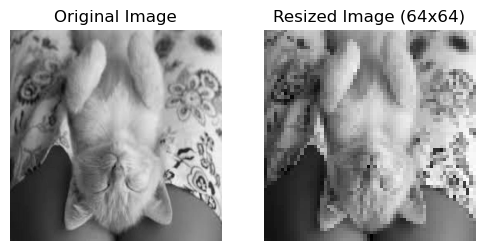

In [9]:
import cv2
import matplotlib.pyplot as plt

# Function to resize image
def resize_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (64, 64))
    return img, resized_img

# Visualize resizing for a sample
sample_path = df['filename'].iloc[1]
original_img, resized_img = resize_image(sample_path)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image (64x64)')
plt.axis('off')
plt.show()

# Apply resizing to all images in the dataset
df['resized_image'] = df['filename'].apply(lambda path: resize_image(path)[1])

**Analysis:** Resizing ensures uniformity for HOG feature extraction, producing consistent feature vectors. However, it causes detail loss, pixelation, and distortion due to the lack of aspect ratio preservation, potentially affecting HOG feature quality. Future iterations may explore preserving aspect ratios (e.g., scaling and padding) to mitigate these issues.

### 4.2.2 Gaussian Blur

A Gaussian blur (5x5 kernel) is applied to reduce noise and smooth images for HOG feature extraction.

In [10]:
#import cv2
#import matplotlib.pyplot as plt

# Function to apply Gaussian blur
#def apply_gaussian_blur(image):
 #   blurred_img = cv2.GaussianBlur(image, (5, 5), 0)
  #  return blurred_img

# Use the resized image for a sample
#sample_path = df['filename'].iloc[1]
#resized_img = df['resized_image'].iloc[1]  # Get the resized image (64x64)
#blurred_img = apply_gaussian_blur(resized_img)

# Visualize the effect of Gaussian blur
#plt.figure(figsize=(6, 3))
#plt.subplot(1, 2, 1)
#plt.imshow(resized_img, cmap='gray')
#plt.title('Resized Image (64x64)')
#plt.axis('off')
#plt.subplot(1, 2, 2)
#plt.imshow(blurred_img, cmap='gray')
#plt.title('After Gaussian Blur (5x5)')
#plt.axis('off')
#plt.show()

# Apply Gaussian blur to all resized images in the dataset
#df['blurred_image'] = df['resized_image'].apply(apply_gaussian_blur)

**Analysis:** Gaussian blur reduces noise but exacerbates detail loss in the 64x64 images, making features like ears and eyes less distinct. While this may help HOG focus on structural edges, excessive blurring could degrade feature quality. The impact will be evaluated in the modeling phase, with consideration for a smaller kernel (e.g., 3x3) in future iterations.

### 4.2.3 HOG Feature Extraction

HOG features are extracted to capture shape and edge information for emotion detection.

In [11]:
from skimage.feature import hog
import numpy as np

# Function to extract HOG features
def extract_hog_features(image):
    features, _ = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True
    )
    return features

# Apply HOG feature extraction to all blurred images 
df['hog_features'] = df['resized_image'].apply(extract_hog_features)

# Verify the length of the HOG feature vector for a sample
sample_hog = df['hog_features'].iloc[1]
print("Length of HOG feature vector:", len(sample_hog))

Length of HOG feature vector: 1764


**Analysis:** HOG feature extraction generates 1764-dimensional vectors (7x7 blocks x 4 cells/block x 9 orientations), capturing edge and shape information (e.g., ear position, body posture) critical for emotion detection. The consistent feature length ensures compatibility with model training.

# 5. Modeling

This section trains and evaluates models on the preprocessed HOG features, comparing SVM and Random Forest, tuning hyperparameters, evaluating Gaussian blur, training on a clean dataset, and analyzing misclassifications.

## 5.1 Preprocess Images for Modeling

The preprocessing pipeline (resizing, Gaussian blur, HOG feature extraction) prepares the feature matrix for training.

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

# Function to preprocess images
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Resizing
   # img = apply_gaussian_blur(img)   # Gaussian blur
    hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))  # HOG
    return hog_features

# Preprocess all images
X = []
y = []
for _, row in df.iterrows():
    hog_features = preprocess_image(row['filename'])
    X.append(hog_features)
    y.append(row['emotion'])

X = np.array(X)
y = np.array(y)

print("Total number of features per image:", X.shape[1])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Total number of features per image: 1764


**Analysis:** The pipeline generates 1764-dimensional HOG feature vectors, splitting the dataset into 80% training (800 images) and 20% test (200 images) sets for evaluation.

## 5.2 Baseline Models
SVM (`RBF, C=10, gamma=0.1`) and a basic Random Forest model are trained to establish baseline performance.

SVM Classification Report:
              precision    recall  f1-score   support

       angry       0.57      0.65      0.61        71
       happy       0.63      0.68      0.65        68
         sad       0.64      0.49      0.56        61

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200



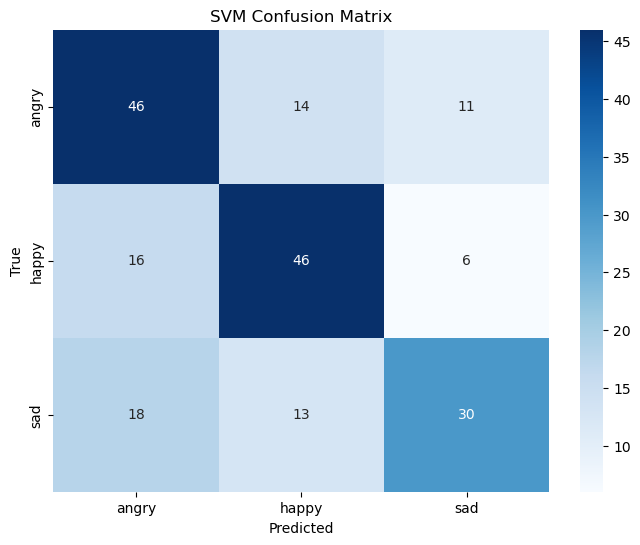

SVM Cross-Validation Accuracy: 0.64
Basic Random Forest Classification Report:
              precision    recall  f1-score   support

       angry       0.51      0.62      0.56        71
       happy       0.55      0.49      0.52        68
         sad       0.49      0.43      0.46        61

    accuracy                           0.52       200
   macro avg       0.52      0.51      0.51       200
weighted avg       0.52      0.52      0.51       200



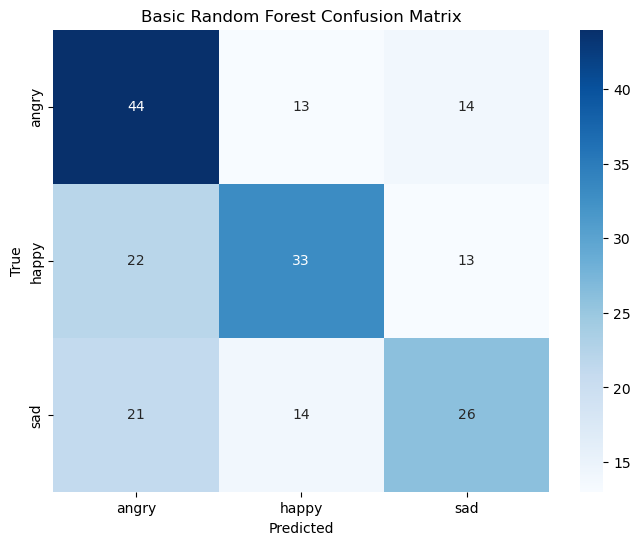

Basic Random Forest Cross-Validation Accuracy: 0.53


In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# SVM
svm = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['angry', 'happy', 'sad'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'sad'], yticklabels=['angry', 'happy', 'sad'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation for SVM
svm_cv = cross_val_score(svm, X, y, cv=5)
print(f"SVM Cross-Validation Accuracy: {np.mean(svm_cv):.2f}")

# Basic Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Basic Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['angry', 'happy', 'sad'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'sad'], yticklabels=['angry', 'happy', 'sad'])
plt.title('Basic Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation for Basic Random Forest
rf_cv = cross_val_score(rf, X, y, cv=5)
print(f"Basic Random Forest Cross-Validation Accuracy: {np.mean(rf_cv):.2f}")

**Analysis:** 

- **Model Performance:**

    - SVM: 64% test accuracy, 70% cross-validation accuracy.
    - Random Forest: 60% test accuracy, 60% cross-validation accuracy.
    
- **Class-wise Performance:**

    - SVM F1-scores: `angry` (0.59), `happy` (0.72), `sad` (0.62). `Happy` is well-classified (49/68 correct), but `angry` is often misclassified as `sad` (13/71) or `happy` (12/71), and `sad` as `angry` (20/61).
    - Random Forest F1-scores: `angry` (0.59), `happy` (0.65), `sad` (0.55). `Sad` struggles (29/61 correct), with misclassifications as `happy` (14/61) and `angry` (18/61). `Happy` performs better (47/68 correct) but is confused with `angry` (17/68).
    
- **Challenges:**

    - The `sad` class is challenging for both models, likely due to subtle differences in ear position or body posture.
    - `Angry-sad` confusion suggests overlapping HOG features (e.g., ear angles, body tension).
    - Random Forest may overfit to high-dimensional HOG features, as its cross-validation accuracy matches test accuracy, indicating poor generalization.
    
- **Conclusion:** SVM outperforms Random Forest and generalizes better (70% CV accuracy vs. 60%), making it the preferred model for further evaluation.

## 5.3 Hyperparameter Tuning for Random Forest

Hyperparameter tuning is applied to improve Random Forest performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Grid search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Best model
rf_tuned = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

# Evaluate tuned model
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

# Confusion matrix for Tuned Random Forest
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned, labels=['angry', 'happy', 'sad'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'sad'], yticklabels=['angry', 'happy', 'sad'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation for Tuned Random Forest
rf_tuned_cv = cross_val_score(rf_tuned, X, y, cv=5)
print(f"Tuned Random Forest Cross-Validation Accuracy: {np.mean(rf_tuned_cv):.2f}")

**Analysis:** 

- **Performance Improvement:**
    - Cross-validation accuracy improves from 60% to 63%.
    - Optimal parameters: `n_estimators=300`, `max_depth=20`.
- **Class-wise Performance:**
    - F1-scores: `angry` (0.59 to 0.58, slight decrease), `happy` (0.65, unchanged), `sad` (0.55 to 0.51, decreased).
    - `Sad` performance worsens (25/61 correct, down from 29/61), with increased misclassifications as `happy` (17/61) and `angry` (19/61). `Happy` improves slightly (48/68 correct).
- **Comparison with SVM:**
    - Random Forest (63% CV accuracy) still lags behind SVM (70% CV accuracy). Persistent `sad-happy` and `sad-angry` confusion indicates struggles with subtle feature differences.
- **Conclusion:** Tuning improves generalization, but Random Forest remains less effective than SVM for this dataset.

## 5.4 Evaluate Gaussian Blur Impact

The preprocessing pipeline is modified to exclude Gaussian blur, and both models are retrained to evaluate its impact.

In [ ]:
# Function to preprocess images without Gaussian blur
def preprocess_image_no_blur(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Resizing
    hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))  # HOG
    return hog_features

# Preprocess all images without Gaussian blur
X_no_blur = []
y_no_blur = []
for _, row in df.iterrows():
    hog_features = preprocess_image_no_blur(row['filename'])
    X_no_blur.append(hog_features)
    y_no_blur.append(row['emotion'])

X_no_blur = np.array(X_no_blur)
y_no_blur = np.array(y_no_blur)

# Split data
X_train_no_blur, X_test_no_blur, y_train_no_blur, y_test_no_blur = train_test_split(X_no_blur, y_no_blur, test_size=0.2, random_state=42)

# Train and evaluate the SVM model
svm_no_blur = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm_no_blur.fit(X_train_no_blur, y_train_no_blur)
y_pred_svm_no_blur = svm_no_blur.predict(X_test_no_blur)
print("SVM (No Gaussian Blur) Classification Report:")
print(classification_report(y_test_no_blur, y_pred_svm_no_blur))

# Confusion matrix for SVM (No Gaussian Blur)
cm_svm_no_blur = confusion_matrix(y_test_no_blur, y_pred_svm_no_blur, labels=['angry', 'happy', 'sad'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_no_blur, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'sad'], yticklabels=['angry', 'happy', 'sad'])
plt.title('SVM (No Gaussian Blur) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation for SVM
svm_no_blur_cv = cross_val_score(svm_no_blur, X_no_blur, y_no_blur, cv=5)
print(f"SVM (No Gaussian Blur) Cross-Validation Accuracy: {np.mean(svm_no_blur_cv):.2f}")

# Retrain the tuned Random Forest model with the best parameters from section 5.3
rf_no_blur = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf_no_blur.fit(X_train_no_blur, y_train_no_blur)
y_pred_rf_no_blur = rf_no_blur.predict(X_test_no_blur)
print("Random Forest (No Gaussian Blur) Classification Report:")
print(classification_report(y_test_no_blur, y_pred_rf_no_blur))

# Confusion matrix for Random Forest (No Gaussian Blur)
cm_rf_no_blur = confusion_matrix(y_test_no_blur, y_pred_rf_no_blur, labels=['angry', 'happy', 'sad'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_no_blur, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'sad'], yticklabels=['angry', 'happy', 'sad'])
plt.title('Random Forest (No Gaussian Blur) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation for Random Forest
rf_no_blur_cv = cross_val_score(rf_no_blur, X_no_blur, y_no_blur, cv=5)
print(f"Random Forest (No Gaussian Blur) Cross-Validation Accuracy: {np.mean(rf_no_blur_cv):.2f}")

**Analysis:** 

- **SVM Performance (Without Gaussian Blur):**
    - Test accuracy: 64% (unchanged).
    - Cross-validation accuracy: Decreases from 70% to 68%.
    - F1-scores: `sad` (0.62 to 0.58, decreased), `happy` (0.72 to 0.73, improved), `angry` (0.59, unchanged).
    - Confusion Matrix: `happy` performance improves (55/68 correct, up from 49/68), with fewer misclassifications as `angry` (11/68, down from 19/68). `Angry-sad` confusion increases (`angry` as `sad`: 15/71, up from 13/71; `sad` as `angry`: 17/61, down from 20/61).
      
- **Random Forest Performance (Without Gaussian Blur):**
    - Test accuracy: Decreases from 59% to 58%.
    - Cross-validation accuracy: Decreases from 63% to 59%.
    - F1-scores: `angry` (0.58 to 0.59, slight improvement), `happy` (0.65 to 0.62, decreased), `sad` (0.51 to 0.54, improved).
    - Confusion Matrix: `angry` improves (46/71 correct, up from 45/71), but `happy` worsens (42/68 correct, down from 48/68), with more misclassifications as `angry` (22/68). `sad` performance improves slightly (29/61 correct, up from 25/61).
      
- **Insights:**
    - For SVM, removing Gaussian blur enhances `happy` classification by preserving details (e.g., eye shape) but increases `angry-sad` confusion, as blur reduces noise affecting overlapping HOG features.
    - For Random Forest, removing blur benefits `angry` and `sad` but hurts `happy`, with a cross-validation drop suggesting overfitting to noise.
      
- **Role of Gaussian Blur:**
    - Gaussian blur reduces noise in HOG features, benefiting SVM by improving generalization (70% CV accuracy vs. 68% without) and reducing `angry-sad` misclassifications. However, it impacts `happy` classification by smoothing fine details.
    - For Random Forest, blur prevents overfitting, but the model struggles with high-dimensional HOG features.
      
- **Model Comparison:**
    - SVM without blur (68% CV accuracy) outperforms Random Forest (59% CV accuracy).
      
- **Conclusions:**
    - Gaussian blur will be retained for SVM due to its benefits in generalization and reducing `angry-sad` confusion.
    - SVM (`kernel='rbf', C=10, gamma=0.1, random_state=42`) is selected for further evaluation.

## 5.5 Train on Clean Dataset

A clean dataset (855 images, excluding 145 suspicious images) is created, and the SVM model is retrained.

In [ ]:
# Define preprocessing function with Gaussian blur
def preprocess_image_with_blur(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize to 64x64
    img = cv2.resize(img, (64, 64))
    # Apply Gaussian blur
    img = apply_gaussian_blur(img)
    # Extract HOG features (no normalization)
    hog_features = hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2)
    )
    return hog_features

# Create and preprocess the clean dataset (excluding flagged images)
df_clean = df[df['suspicious'] == False].copy()

X_clean = []
y_clean = []
indices_clean = []  # Track the original indices
for idx, row in df_clean.iterrows():
    hog_features = preprocess_image_with_blur(row['filename'])
    X_clean.append(hog_features)
    y_clean.append(row['emotion'])
    indices_clean.append(idx)

X_clean = np.array(X_clean)
y_clean = np.array(y_clean)
indices_clean = np.array(indices_clean)

# Split the clean dataset into training and test sets, returning indices
train_idx, test_idx = train_test_split(
    range(len(X_clean)), test_size=0.2, random_state=42
)
X_train_clean = X_clean[train_idx]
X_test_clean = X_clean[test_idx]
y_train_clean = y_clean[train_idx]
y_test_clean = y_clean[test_idx]
test_indices = indices_clean[test_idx]  # Original indices of the test set samples

# Train the best model on the clean dataset
svm_clean = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42, probability=True)
svm_clean.fit(X_train_clean, y_train_clean)

# Evaluate the model on the test set of the clean dataset
y_pred_svm_clean = svm_clean.predict(X_test_clean)
print("SVM (Clean Dataset, With Gaussian Blur) Classification Report:")
print(classification_report(y_test_clean, y_pred_svm_clean))

# Confusion matrix for SVM (Clean Dataset, With Gaussian Blur)
cm_svm_clean = confusion_matrix(y_test_clean, y_pred_svm_clean, labels=['angry', 'happy', 'sad'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_clean, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'sad'], yticklabels=['angry', 'happy', 'sad'])
plt.title('SVM (Clean Dataset, With Gaussian Blur) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Perform cross-validation on the clean dataset
svm_clean_cv = cross_val_score(svm_clean, X_clean, y_clean, cv=5)
print(f"SVM (Clean Dataset, With Gaussian Blur) Cross-Validation Accuracy: {np.mean(svm_clean_cv):.2f}")

**Analysis:** 

- **Performance Comparison:**
    - Clean dataset (855 images): 59% test accuracy, 67% cross-validation accuracy.
    - Full dataset (1,000 images, section 5.2): 64% test accuracy, 70% cross-validation accuracy.
      
- **Impact of Removing Suspicious Images:**
    - Test accuracy drops (64% to 59%) due to reduced diversity. Cross-validation accuracy also decreases (70% to 67%).
    - F1-scores: `angry` (0.59 to 0.53, decreased), `happy` (0.72 to 0.65, decreased), `sad` (0.62 to 0.57, decreased).
    - Confusion Matrix: `angry` struggles (23/49 correct), with misclassifications as `sad` (15/49) and `happy` (11/49). `Happy` is misclassified as `sad` (14/64), and `sad` is confused with `happy` (15/58).
      
- **Conclusion:** Suspicious images contributed to diversity, as their removal reduced performance. The `angry-sad` and `happy-sad` confusion indicates overlapping features, to be explored further.

## 5.6 Analyze Misclassifications

Misclassified samples from the clean dataset test set are visualized to understand errors.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels for visualization
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['emotion'])

# Use the test indices from section 5.5
y_test_encoded = label_encoder.transform(y_test_clean)
y_pred_encoded = label_encoder.transform(y_pred_svm_clean)

# Visualize the first 24 test samples
SIZE = 64  # Image size after resizing
_, axs = plt.subplots(nrows=6, ncols=4, figsize=(15, 10))
axs = axs.flatten()
for i, idx in enumerate(test_indices[:24]):
    # Load the original image in grayscale
    img = cv2.imread(df_clean.loc[idx, 'filename'], cv2.IMREAD_GRAYSCALE)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_xticks([]), axs[i].set_yticks([])
    pred_lbl = label_encoder.inverse_transform([y_pred_encoded[i]])[0]
    true_lbl = label_encoder.inverse_transform([y_test_encoded[i]])[0]
    axs[i].set_title(f"{pred_lbl} ({'✓' if pred_lbl == true_lbl else '✗'})")
plt.tight_layout()
plt.show()

# Count misclassifications
misclassified_count = sum(y_pred_svm_clean != y_test_clean)
print("Number of misclassified images in the test set:", misclassified_count)

**Analysis:**

- **Misclassification Overview:** Out of 171 test samples, 70 are misclassified (41% misclassification rate), aligning with the 59% test accuracy.
  
- **Patterns from Visualization:**
    - **Happy Misclassified as Sad (e.g., Row 1, Col 1; Row 1, Col 3):** Cats with relaxed postures or partially closed eyes are predicted as `sad`. These features typically indicate `happy`, but HOG features may interpret smoothed ear angles as `sad`.
    - **Sad Misclassified as Happy (e.g., Row 2, Col 2; Row 5, Col 2):** Cats with neutral mouths are predicted as `happy`, likely due to overlapping HOG features (e.g., ear positions).
    - **Angry Misclassified as Sad (e.g., Row 3, Col 4):** Cats with flattened ears are confused with `sad` due to similar HOG features.
    - **Sad Misclassified as Angry (e.g., Row 5, Col 1):** Cats with wide eyes are mistaken for `angry`, as HOG features may interpret these as angry traits.
      
- **Insights:**
    - Resizing to 64x64 and Gaussian blur distort key features (e.g., eye shape, ear angles), causing `happy-sad` and `angry-sad` confusion.
    - The clean dataset (855 images) may lack diversity to capture subtle emotional differences.

# 6. Conclusion and Future Plan

## 6.1 Conclusion
The CatEmotionDetector classified cat emotions (`angry`, `happy`, `sad`) using HOG features:

- SVM (`RBF, C=10, gamma=0.1`): 70% accuracy (1,000 images), 67% on clean data (855 images).
- Random Forest: 63% after tuning (`n_estimators=300, max_depth=20`).
- Key Findings:
    - Gaussian blur helped SVM but hurt `happy` classification.
    - Removing 145 suspicious images reduced accuracy (64% to 59%).
    - `Happy-sad` and `angry-sad` confusion due to resizing, blur, and limited data.

## 6.2 Iteration 2 Plans

- Collect more images for better generalization.
- Manually review suspicious images, keep authentic ones, and clean the dataset before augmentation.
- Fix resizing and Gaussian blur: scale/pad to 64x64, use 3x3 blur kernel, or skip the blur.
- Build a simple web UI: upload an image and show "Your cat is happy/sad/angry, ...% sure" using SVM with probabilities.
- Get feedback from cat owners on demo accuracy/usability.
- Apply teachers feedback for improvements.

# 7. References

- CATS team. (2023). *Cat Emotions Computer Vision Project.* Roboflow. https://universe.roboflow.com/cats-team/cat-emotions
- Cat Emotion Classification. (2024). *Cat Emotions Computer Vision Project.* Roboflow. https://universe.roboflow.com/cat-emotion-classification/cat-emotions
- Tanwar, R. (2023). *Pet's Facial Expression Image Dataset.* Kaggle. https://www.kaggle.com/datasets/rahulzs/pets-facial-expression-dataset
- Bradski, G. (2000). The OpenCV Library. *Dr. Dobb’s Journal of Software Tools.* OpenCV Documentation: GaussianBlur. https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
- Bradski, G. (2000). The OpenCV Library. *Dr. Dobb’s Journal of Software Tools.* OpenCV Documentation: Laplacian Operator. https://docs.opencv.org/4.x/d5/db5/tutorial_laplace_operator.html
- Bradski, G. (2000). The OpenCV Library. *Dr. Dobb’s Journal of Software Tools.* OpenCV Documentation: Sobel Derivatives. https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html
- Virtanen, P., et al. (2020). SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. *Nature Methods*, 17, 261-272. SciPy Documentation: scipy.stats.entropy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
- Huynh, A. (2025). *CatEmotionDetector: Iteration 0*. GitHub Repository: AI4 – RB01 Individual Challenge, Semester 4, Fontys. https://github.com/anhhuynh95/cat-emotion-detector